## Modèles

#### Regressions (linéaire et non linéaire), KNN, SVR

### Regression linéaire
<br>LinearRegression ajuste un modèle linéaire avec des coefficients w = (w1,…, wp) pour minimiser la somme <br> résiduelle des carrés entre les cibles observées dans le jeu de données et les cibles prédites par l'approximation linéaire.

1) Importer les librairies classiques : numpy, pandas, seaborn et matplolib


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

2) Lire le fichier U_I.csv avec pandas 

In [4]:
datas = pd.read_csv('U_I.csv', sep=";")

3) Pour chaque colonne dans le tableau de données, donner le nombre d'éléments, les valeurs max, min

In [5]:
print(datas.max())
print(datas.size)

U    400.000000
I     50.012382
dtype: float64
200


4) Tracer I(U), sous forme de nuage de points

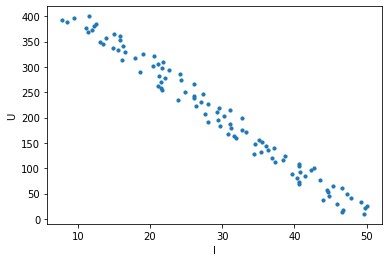

In [6]:
Y = datas.values[:, 0]
X = datas.values[:, 1]

plt.scatter(X, Y, s=10)
plt.xlabel('I')
plt.ylabel('U')
plt.show()

5) Séparer les deux collones du fichier en 4 listes de données X_train, X_test, Y_train, Y_test avec 80% pour train
   et 20% pour test en utilisant: from sklearn.model_selection import train_test_split

In [7]:
from sklearn.model_selection import train_test_split

train_datas, test_datas = train_test_split(datas.values, test_size=20)

Y_train = [train_datas[i][0] for i in range(len(train_datas))]
X_train = [train_datas[i][1] for i in range(len(train_datas))]
Y_test = [test_datas[i][0] for i in range(len(test_datas))]
X_test = [test_datas[i][1] for i in range(len(test_datas))]


6) Vérifier le pourcentage de la séparation. Afficher 5 élement de X_train à partir de l'élement 25. Comparer les avec ui_df['U'] 

In [8]:
print(len(X_test) / (len(X_test) + len(X_train)))

0.2


7) Redimensionner X_train,Y_train, X_test et Y_test en utilisant la méthode "reshape", e.g.
x_train=X_train.values.reshape(-1,1)

In [10]:
x_train = np.reshape(X_train, (-1, 1))
y_train = np.reshape(Y_train, (-1, 1))
x_test = np.reshape(X_test, (-1, 1))
y_test = np.reshape(Y_test, (-1, 1))

7) Tracer sur la même figure les nuages de points des données "train" et "test"

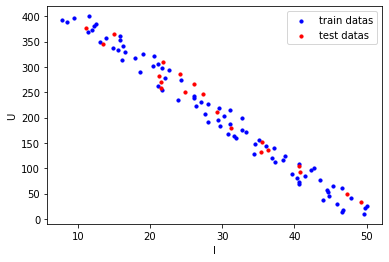

In [11]:
plt.scatter(x_train, y_train, s=10, c='blue', label='train datas')
plt.scatter(x_test, y_test, s=10, c='red', label='test datas')
plt.xlabel('I')
plt.ylabel('U')
plt.legend()
plt.show()

8) Entrainer un modèle de régression linéaire avec les données "train". Calculer les coefficients de détermination (R²) pour les données "train" et "test" respectivement
https://lexique.netmath.ca/coefficient-de-determination/

In [13]:
from sklearn.linear_model import LinearRegression
model_linReg = LinearRegression()

model_linReg.fit(x_train, y_train)
precision = model_linReg.score(x_test, y_test)


resistance = model_linReg.coef_[0, 0]
constante = model_linReg.intercept_[0]
print(constante)
print("rapport R = U/I =", resistance, 'Ohms')

print(precision*100)

489.67622648195197
rapport R = U/I = -9.719895254626044 Ohms
97.0378800684831


9) Tracer le nuage des points des données et tracer la droite donnée par le modèle

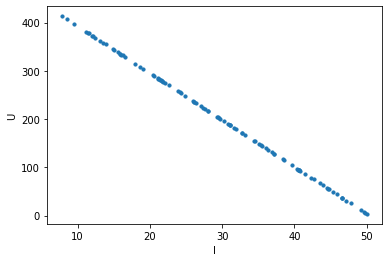

In [14]:
X = datas.values[:, 1]
x = np.reshape(X, (-1, 1))
y = model_linReg.predict(x)

plt.scatter(x, y, s=10)
plt.xlabel('I')
plt.ylabel('U')
plt.show()

10) Vérifer la valeur de courant pour U=100V. Mettre ce point sur le graphique précédent

[[-482.31329898]]


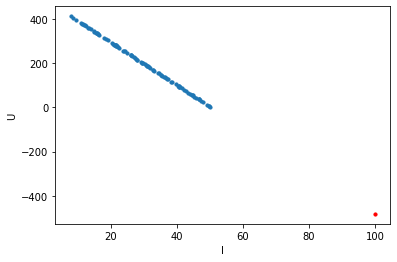

In [15]:
U = 100 #Volts
I = model_linReg.predict([[U]])
print(I)

plt.scatter(x, y, s=10)
plt.scatter(U, I, s=10, c='red')

plt.xlabel('I')
plt.ylabel('U')
plt.show()
